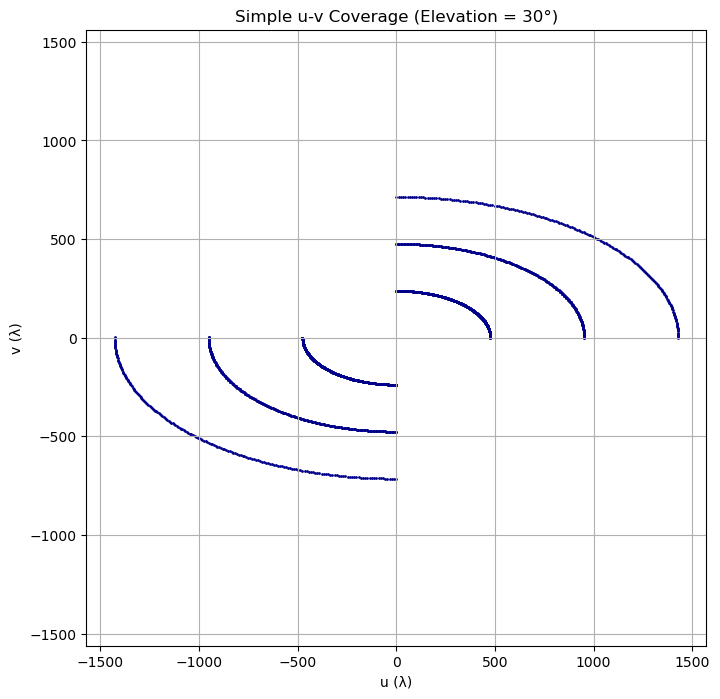

[100, 200, 300, 100, 200, 100]


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
duration = 6.01 #hr
num_antennas = 4
antenna_spacing = 100  # meters
wavelength = 0.21  # meters (~1.42 GHz, 21cm line)
source_elevation_deg = 30  # try 90 or 30

# Generate antenna positions (East-West linear array)
positions = np.array([i * antenna_spacing for i in range(num_antennas)])

# Get all unique baselines (i < j)
baselines = []
for i in range(num_antennas):
    for j in range(i + 1, num_antennas):
        baseline = positions[j] - positions[i]
        baselines.append(baseline)

# Simulate Earth rotation synthesis
hour_angles = np.linspace(0, duration, 200)  # in hours

ha_rad = np.radians(hour_angles * 15)  # convert to degrees -> radians

# Elevation effect: compress v-component as cos(elevation)
elevation_rad = np.radians(source_elevation_deg)
v_scale = np.cos(np.pi / 2 - elevation_rad)  # ~sin(elevation)

# Compute u-v coordinates
u_coords = []
v_coords = []

for b in baselines:
    for ha in ha_rad:
        u = (b / wavelength) * np.sin(ha)
        v = (b / wavelength) * np.cos(ha) * v_scale
        u_coords.append(u)
        v_coords.append(v)
        # include negative (conjugate symmetry)
        u_coords.append(-u)
        v_coords.append(-v)

# Plotting
plt.figure(figsize=(8, 8))
plt.scatter(u_coords, v_coords, s=1, color='darkblue')
plt.title(f'Simple u-v Coverage (Elevation = {source_elevation_deg}°)')
plt.xlabel('u (λ)')
plt.ylabel('v (λ)')
plt.grid(True)
plt.axis('equal')
plt.show()

print(baselines)